In [38]:
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

import cv2
from tqdm import tqdm

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch import optim
import torchvision

from models import AutoEncoder, RelativeMSE
from dataset import ImageDataset
from parser import main_parser
from utils import load_checkpoint, save_checkpoint

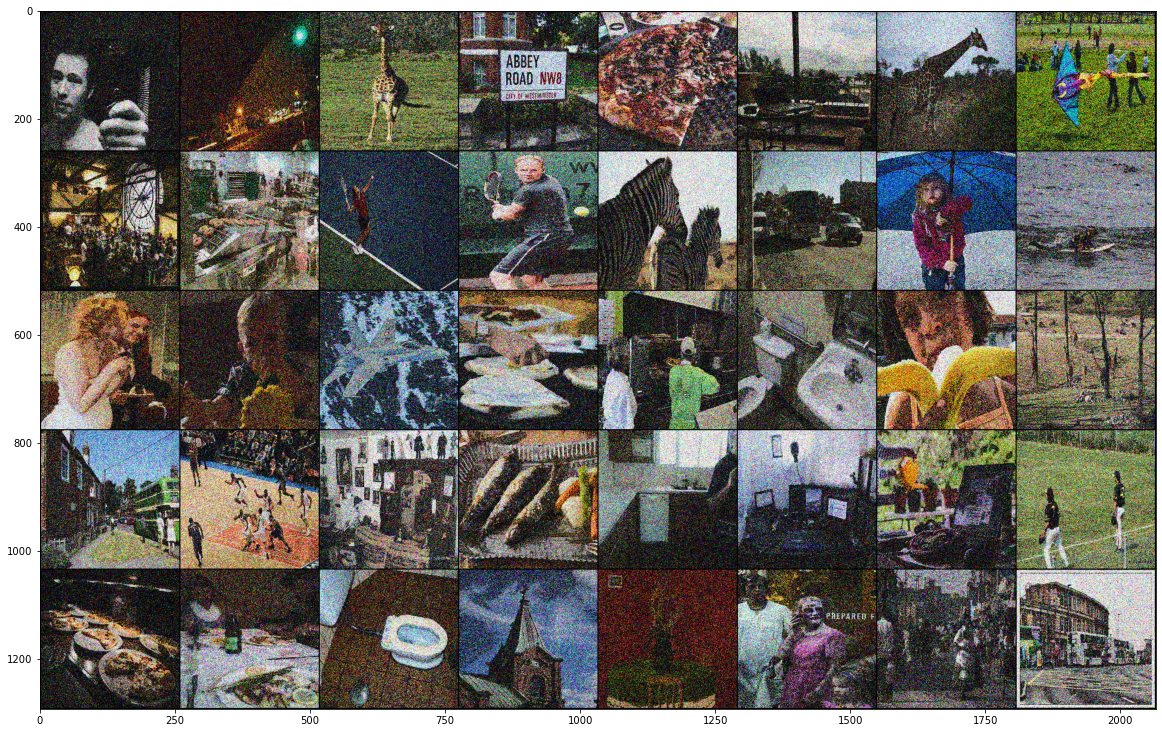

In [48]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()
])


g_min=0.25
g_max=0.3
p_min=0.35
p_max=0.5

test_dataset = ImageDataset('coco/test', transform=transform, g_min=g_min, g_max=g_max, p_min=p_min, p_max=p_max)
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=False)


noise_images = []
# clean_images = []
num_batches = 40 // 2
for batch_idx, (x, t) in enumerate(test_loader):
    if batch_idx >= num_batches:
        break
    noise_images.append(x)
    # clean_images.append(t)

noise_images = torch.cat(noise_images, dim=0)
# clean_images = torch.cat(clean_images, dim=0)

img_grid_noise = torchvision.utils.make_grid(noise_images, nrow=8)
# img_grid_clean = torchvision.utils.make_grid(clean_images, nrow=8)


plt.figure(figsize=(20, 20))
plt.imshow(img_grid_noise.permute(1, 2, 0))